# Loading libraries

In [5]:
import pandas as pd
import numpy as np
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
import warnings

[nltk_data] Downloading package wordnet to /Users/Zapi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/Zapi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Load data

In [6]:
import openpyxl  # Ensure openpyxl is installed for Excel reading
import os

# Set the path to the local data file
data_path = 'data/cleaned_corpus_old.xlsx'

# Check if file exists
if not os.path.exists(data_path):
    print(f"Warning: File not found at {data_path}")
    print("Please ensure the file exists at the specified path")
else:
    print(f"Loading data from: {data_path}")

Loading data from: data/cleaned_corpus_old.xlsx


In [7]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [8]:
# Load data from local Excel file
corpus = pd.read_excel(data_path)

# Convert date_published as datetime data type
corpus['date_published'] = pd.to_datetime(
  corpus['date_published']
)

## Inspecting the data

In [9]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7864 entries, 0 to 7863
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            7864 non-null   object        
 1   link             7864 non-null   object        
 2   date_published   7815 non-null   datetime64[ns]
 3   text             7864 non-null   object        
 4   like_count       7815 non-null   float64       
 5   reply_parent_id  634 non-null    object        
 6   source           7864 non-null   object        
 7   cleaned_text     7818 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 491.6+ KB


In [10]:
display(
  corpus.head()
)
display(
  corpus.tail()
)

,title,link,date_published,text,like_count,reply_parent_id,source,cleaned_text
0,[Rear View] Is Marcos looking for his Napoles?,2025-08-22T16:00:00+08:00,NaT,President Ferdinand Marcos Jr. is doubling dow...,NaN,NaN,rappler,president ferdinand marcos jr doubling pledge ...
1,Fixing the flood problem: What's in it for Ram...,2025-08-22T14:49:01+08:00,NaT,"MANILA, Philippines – Filipino billionaire Ram...",NaN,NaN,rappler,manila philippines filipino billionaire ramon ...
2,Gardiola clan's DPWH deals hit billions after ...,2025-08-22T12:00:00+08:00,NaT,Two construction firms owned by Construction W...,NaN,NaN,rappler,two construction firms owned construction work...
3,[In This Economy] The hypocrisy in Marcos’ new...,2025-08-22T10:44:11+08:00,NaT,President Ferdinand Marcos Jr. seems to be spe...,NaN,NaN,rappler,president ferdinand marcos jr seems spending i...
4,Which Bulacan towns got biggest slices of DPWH...,2025-08-22T08:00:00+08:00,NaT,"With every typhoon or heavy downpour, large pa...",NaN,NaN,rappler,every typhoon heavy downpour large parts bulac...


,title,link,date_published,text,like_count,reply_parent_id,source,cleaned_text
7859,Dahil after the typhoon wala na ang ebidensiya.,https://www.youtube.com/watch?v=QHKjGHbj-Gc&lc...,2025-08-11 14:29:49,Dahil after the typhoon wala na ang ebidensiya.,2.0,NaN,youtube,typhoon ebidensiya
7860,Yabang mo kasi! Inuuna nyo impeachment sira ulo!,https://www.youtube.com/watch?v=QHKjGHbj-Gc&lc...,2025-08-11 14:28:26,Yabang mo kasi! Inuuna nyo impeachment sira ulo!,0.0,NaN,youtube,yabang inuuna impeachment sira ulo
7861,"Gnyan klkaran ng kurakot s Dpwh ,lhat nyan my ...",https://www.youtube.com/watch?v=QHKjGHbj-Gc&lc...,2025-08-11 14:27:42,"Gnyan klkaran ng kurakot s Dpwh ,lhat nyan my ...",0.0,NaN,youtube,gnyan klkaran kurakot dpwh lhat nyan lgay frm ...
7862,Magic ni Sec. Bonoan yan alam na alam nya laha...,https://www.youtube.com/watch?v=QHKjGHbj-Gc&lc...,2025-08-11 14:17:28,Magic ni Sec. Bonoan yan alam na alam nya laha...,1.0,NaN,youtube,magic sec bonoan alam alam sinong politiko sin...
7863,Kamara yan d muba alam sinsbi ni mayor magalon...,https://www.youtube.com/watch?v=QHKjGHbj-Gc&lc...,2025-08-11 16:56:24,Kamara yan d muba alam sinsbi ni mayor magalon...,0.0,Ugz2yhnhyLEQN1c2xO54AaABAg,youtube,kamara muba alam sinsbi mayor magalong bawat d...


# Topic Modeling

In [11]:
!pip install pyLDAvis

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis

  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached markupsafe-3.0.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (2.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 14.0 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.4/24.4 MB 3.2 MB/s  0:00:07m0:00:0100:01m
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Using cached markupsafe-3.0.3-cp313-cp313-macosx_11_0_arm64.whl (12 kB)
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [pyLDAvis]8/9 [pyLDAvis]s]


## Document-Term Matrix

In [12]:
# ERROR: ValueError: np.nan is an invalid document, expected byte or unicode string.
corpus['cleaned_text'] = corpus['cleaned_text'].fillna('')

In [13]:
vectorizer = CountVectorizer(
  max_df=0.95,  # terms that appears 95% within the corpus
  min_df=2,  # terms that appear at 2x within the corpus
  stop_words='english'  # ignore english stopwords
)
doc_term_matrix = vectorizer.fit_transform(
  corpus['cleaned_text']
)

doc_term_matrix.toarray().shape
# (851, 2065) --> 851 documents and 2065 unique words

(7864, 7691)

In [14]:
pd.DataFrame(
  doc_term_matrix.toarray()
)

,0,1,2,3,4,5,6,7,8,9,...,7681,7682,7683,7684,7685,7686,7687,7688,7689,7690
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## LDA

In [15]:
LDA = LatentDirichletAllocation(
  n_components=3,  # no. of topics
  random_state=42  # random seed for replicability
)
LDA.fit(doc_term_matrix)

,n_components,3
,doc_topic_prior,None
,topic_word_prior,None
,learning_method,'batch'
,learning_decay,0.7
,learning_offset,10.0
,max_iter,10
,batch_size,128
,evaluate_every,-1
,total_samples,1000000.0
,perp_tol,0.1


In [16]:
len(LDA.components_)

3

## Topic-Term Matrix

In [17]:
topic_term_matrix = LDA.components_
pd.DataFrame(topic_term_matrix)

,0,1,2,3,4,5,6,7,8,9,...,7681,7682,7683,7684,7685,7686,7687,7688,7689,7690
0,4.978110,0.342268,1.806211,0.333733,2.320432,0.339733,0.497898,2.258224,2.330928,0.333579,...,6.037035,4.357830,1.462968,11.341251,7.260953,24.568539,5.866647,3.299301,0.57116,0.430316
1,2.428405,0.372991,2.836362,2.332578,0.333640,6.294864,2.168281,0.377079,0.333472,2.320700,...,0.334519,22.343926,4.005089,1.659811,0.396083,72.809151,7.524907,0.354031,7.02882,0.333995
2,0.593485,3.284741,0.357427,0.333689,0.345927,0.365403,0.333821,0.364697,0.335601,0.345721,...,0.628446,8.298244,0.531943,8.998938,0.342964,29.622310,13.608445,0.346667,3.40002,2.235689


In [18]:
topic1 = topic_term_matrix[0]
topic1

# sort the scores from lowest to highest
# will return all terms
topic1.argsort()

# select top 10 terms within topic1
topic1_term_index = topic1.argsort()[-10:]

# convert back to words/terms
[vectorizer.get_feature_names_out()[index] for index in topic1_term_index]

['government',
 'kulong',
 'marcos',
 'president',
 'pera',
 'magnanakaw',
 'bayan',
 'projects',
 'control',
 'flood']

In [19]:
for topic_number, topic in enumerate(LDA.components_):
  print(f'The top 10 words for topic #{topic_number}')
  print(
    [
      vectorizer.get_feature_names_out()[term_index] for term_index in topic.argsort()[-5:]
    ]
  )
  print("\n")

The top 10 words for topic #0
['magnanakaw', 'bayan', 'projects', 'control', 'flood']


The top 10 words for topic #1
['bbm', 'corrupt', 'corruption', 'dpwh', 'project']


The top 10 words for topic #2
['villanueva', 'control', 'flood', 'alam', 'dpwh']




## Document-Topic Matrix

In [20]:
doc_topic_matrix = LDA.transform(doc_term_matrix)
pd.DataFrame(doc_topic_matrix)

,0,1,2
0,0.407306,0.591666,0.001028
1,0.659179,0.002107,0.338714
2,0.886523,0.000485,0.112992
3,0.890370,0.108900,0.000729
4,0.494950,0.000612,0.504437
...,...,...,...
7859,0.757570,0.121633,0.120797
7860,0.059611,0.068048,0.872341
7861,0.070308,0.021668,0.908024
7862,0.033831,0.035329,0.930840


In [21]:
corpus['Topic'] = doc_topic_matrix.argmax(axis=1)
display(
  corpus[['cleaned_text', 'source', 'Topic']]
)
corpus[['cleaned_text', 'source', 'Topic']].to_excel('topic_documents.xlsx')

,cleaned_text,source,Topic
0,president ferdinand marcos jr doubling pledge ...,rappler,1
1,manila philippines filipino billionaire ramon ...,rappler,0
2,two construction firms owned construction work...,rappler,0
3,president ferdinand marcos jr seems spending i...,rappler,0
4,every typhoon heavy downpour large parts bulac...,rappler,2
...,...,...,...
7859,typhoon ebidensiya,youtube,0
7860,yabang inuuna impeachment sira ulo,youtube,2
7861,gnyan klkaran kurakot dpwh lhat nyan lgay frm ...,youtube,2
7862,magic sec bonoan alam alam sinong politiko sin...,youtube,2


In [22]:
display(
  corpus.query("Topic == 2 and source == 'rappler'")['text']
)

display(
  corpus.query("Topic == 1 and source == 'youtube'")['text']
)

4     With every typhoon or heavy downpour, large pa...
12    MANILA, Philippines – “Hello Darcy — and Anna,...
15    MANILA, Philippines – Senator Ping Lacson deli...
32    NEGROS OCCIDENTAL, Philippines – In July, most...
Name: text, dtype: object

50                               File cases against them.
55      Sorry to say PBBM, replace Secretary Bonoan, m...
57      Any flood control project without billboard is...
58      Naglolokohan na naman. Di niyo kakasuhan? Di n...
59      Isolated case or systemic corruption in the go...
                              ...                        
7851    Good job Mahal na BBM,,managot ang dapat manag...
7852    ikaw p ang nag imbistiga…ibigay mo yan sa ahen...
7855    Buti nga pinansin yan magagalit nanaman mga dd...
7857    Tumahimik ka dds. Bagong script at narratiblve...
7858    3yrs  , 645billion pesos  inubos binabaha pa r...
Name: text, Length: 2684, dtype: object

## Visualize using PyLDAViz

In [23]:
vocab = vectorizer.get_feature_names_out()
doc_lengths = [
  len(doc) for doc in corpus['cleaned_text']
]
term_freq = doc_term_matrix.sum(axis=0)
term_freqs = np.array(term_freq).flatten()
vis_data = pyLDAvis.prepare(topic_term_matrix, doc_topic_matrix, doc_lengths, vocab, term_freqs)

pyLDAvis.display(vis_data)

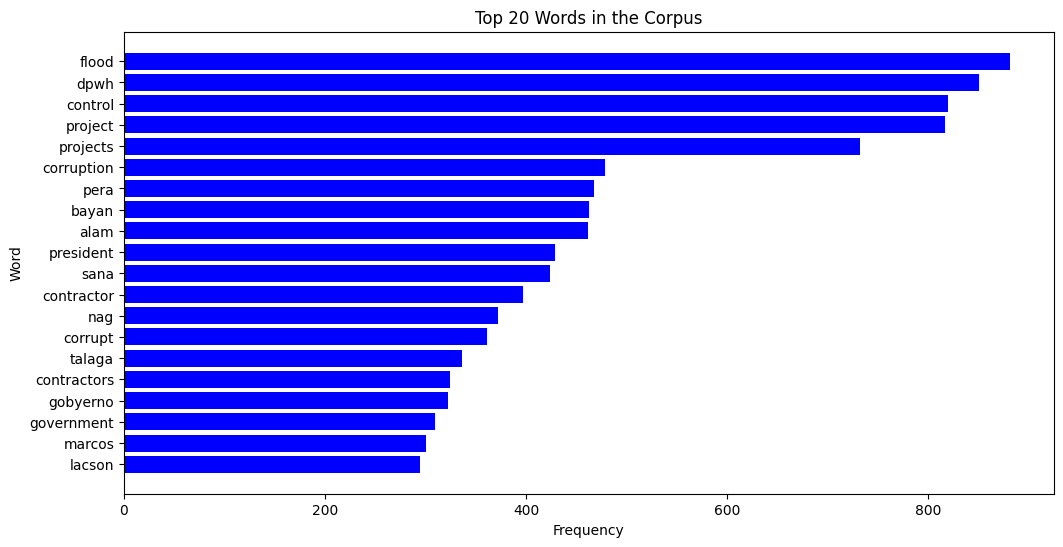

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get vocabulary and term frequencies
vocab = vectorizer.get_feature_names_out()
term_freq = np.array(doc_term_matrix.sum(axis=0)).flatten()

# Create dataframe of words and frequencies
word_freq_df = pd.DataFrame({
    'word': vocab,
    'frequency': term_freq
})

# Sort and select top 20
top_words = word_freq_df.sort_values(by='frequency', ascending=False).head(20)

# Plot bar graph
plt.figure(figsize=(12,6))
plt.barh(top_words['word'][::-1], top_words['frequency'][::-1], color="blue")  # horizontal bar chart
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.title("Top 20 Words in the Corpus")
plt.show()

In [30]:
corpus.to_excel('./data/corpus_with_topics.xlsx', index=False)